In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MDS (MultiDimensional Scaling)
Allows to recostruct the geometry of a system given interdistances between agents.
The thory can be found at: https://en.wikipedia.org/wiki/Multidimensional_scaling

Of course the reconstruction suffers from rotation, translation and mirror ambiguity.

In [10]:
def MDS(dist_matrix):
	"""
	Multi Dimension Scaling
	
	@param1: A matrix of distances
	@return: List of found poistions (can be also with immaginary part)
	"""
	n = len(dist_matrix) # number of samples
	m = 2 # output dimensions (2D)
	D = dist_matrix

	# Define some variables
	I = np.identity(n)
	J = np.ones((n,n))

	# Centering matrix
	C = I - (1/n)*J

	# Calc the double centering
	B = -0.5*np.dot(np.dot(C,D**2),C)

	# Get eigenvalues and eigenvectors
	eigenvalues, eigenvectors = np.linalg.eig(B)

	# Sort eigenvalues idex from in descending mode
	sortedIdx = list(np.argsort(eigenvalues))[::-1]
	
	# Get the m largest eigenvalues and corresponding eigenvectors
	eigenvalues = np.array([eigenvalues[i] for i in sortedIdx[0:m]])
	eigenvectors = np.array([eigenvectors[:,i] for i in sortedIdx[0:m]]).transpose()

	# Return the results
	return np.dot(eigenvectors, np.sqrt(np.diag(eigenvalues)))

## Example

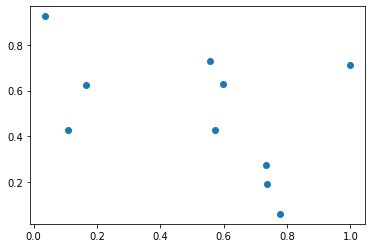

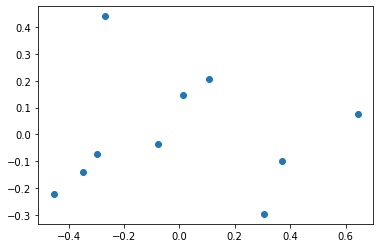

In [16]:
if __name__ == "__main__":
    def rnd(): return np.random.rand()
    def dist(p1, p2): return np.linalg.norm(p1-p2) 
    def noise(): return np.random.normal(0, 0.000)

    # Create some random points in 2d space
    n = 10 # number of points
    P = np.array([[rnd(), rnd()] for i in range(n)])
    plt.scatter(P[:,0], P[:,1])
    plt.show()
    
    # Create the distance matrix
    D = np.zeros((n,n))
    # Fill the distance matrix
    for i in range(len(P)):
        for j in range(len(P)):
            if i != j: D[i,j] = dist(P[i], P[j]) + noise()

    res = MDS(D)
    res = np.real(res) # In some cases there can be also the immaginary part
    plt.scatter(res[:,0], res[:,1])
    plt.show()